In [1]:
from random import randint, sample
from collections import namedtuple
from enum import IntEnum
%matplotlib notebook
from matplotlib import pyplot as pp
import numpy as np

In [2]:
ТипыПоездок = IntEnum("ТипыПоездок", "метро наземный")
Цены = namedtuple("Цены", list(ТипыПоездок.__members__.keys()))

In [3]:
class Билет:
    МАКС_ПОЕЗДОК = 1
    ЦЕНЫ = Цены(метро=0, наземный=0)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 5

    def __init__(билет):
        билет.ост_поездок = 0
        билет.куплено = 0
        билет.потрачено = 0
        билет.действителен_дней = -1

    def __str__(self):
        nm = self.__class__.__name__
        return nm

    def поездка(билет, тип_поездки, **доп_арг):
        if not билет.можно_ездить():
            билет.купить_ещё(тип_поездки, **доп_арг)
        билет.ост_поездок -= 1

    def купить_ещё(билет, тип_поездки, **доп_арг):
        билет.потрачено += билет.ЦЕНЫ[int(тип_поездки)-1]
        билет.ост_поездок = билет.МАКС_ПОЕЗДОК
        билет.действителен_дней = билет.ДНЕЙ_ДЕЙСТВИТЕЛЕН

    def конец_дня(билет):
        билет.действителен_дней -= 1

    def ещё_действителен(билет):
        return билет.действителен_дней > 0

    def есть_поездки(билет):
        return билет.ост_поездок > 0

    def можно_ездить(билет):
        return билет.есть_поездки() and билет.ещё_действителен()

In [92]:
class Единый1(Билет):
    МАКС_ПОЕЗДОК = 1
    ЦЕНЫ = Цены(метро=55, наземный=55)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 5


class Единый2(Билет):
    МАКС_ПОЕЗДОК = 2
    ЦЕНЫ = Цены(метро=110, наземный=110)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 5


# class Единый20(Билет):
#     МАКС_ПОЕЗДОК = 20
#     ЦЕНЫ = Цены(метро=747, наземный=747)
#     ДНЕЙ_ДЕЙСТВИТЕЛЕН = 90


# class Единый40(Билет):
#     МАКС_ПОЕЗДОК = 40
#     ЦЕНЫ = Цены(метро=1494, наземный=1494)
#     ДНЕЙ_ДЕЙСТВИТЕЛЕН = 90


class Единый60(Билет):
    МАКС_ПОЕЗДОК = 60
    ЦЕНЫ = Цены(метро=1900, наземный=1900)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 45

Единые = [Единый1, Единый2, 
          #Единый20, Единый40, 
#           Единый60
         ]

In [93]:
class БезлимитныйБилет(Билет):
    def есть_поездки(билет):
        return True

class Безлимит1(БезлимитныйБилет):
    ЦЕНЫ = Цены(метро=230, наземный=230)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 1


class Безлимит3(БезлимитныйБилет):
    ЦЕНЫ = Цены(метро=438, наземный=438)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 3


# class Безлимит7(БезлимитныйБилет):
#     ЦЕНЫ = Цены(метро=830, наземный=830)
#     ДНЕЙ_ДЕЙСТВИТЕЛЕН = 7


class Безлимит30(БезлимитныйБилет):
    ЦЕНЫ = Цены(метро=2170, наземный=2170)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 30


class Безлимит90(БезлимитныйБилет):
    ЦЕНЫ = Цены(метро=5430, наземный=5430)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 90


# class ЛьготныйБезлимит30(БезлимитныйБилет):
#     ЦЕНЫ = Цены(метро=630, наземный=630)
#     ДНЕЙ_ДЕЙСТВИТЕЛЕН = 30


# class ЛьготныйБезлимит90(БезлимитныйБилет):
#     ЦЕНЫ = Цены(метро=1140+750, наземный=1140+750)
#     ДНЕЙ_ДЕЙСТВИТЕЛЕН = 90



class Безлимит365(БезлимитныйБилет):
    ЦЕНЫ = Цены(метро=19500, наземный=19500)
    ДНЕЙ_ДЕЙСТВИТЕЛЕН = 365


Безлимитные = [Безлимит1, 
    Безлимит3, 
#     Безлимит30, Безлимит90, 
#     ЛьготныйБезлимит30, ЛьготныйБезлимит90, 
#     Безлимит365
]

In [94]:
class Тройка(Билет):
    ЦЕНЫ = Цены(метро=38, наземный=38)
    ЦЕНА_90минут = 21
    def __init__(self):
        super().__init__()
        self.время_от_начала = 0
        self.предыдущий_тип = None
        self.доп_уплачен = False

    def купить_ещё(билет, тип_поездки, время_между_поездками=30, время_поездки=30):
        билет.время_от_начала += время_между_поездками
        if билет.время_от_начала > 90 or билет.предыдущий_тип is None:
            билет.время_от_начала = время_поездки
            билет.предыдущий_тип = тип_поездки
            билет.доп_уплачен = False
            return super().купить_ещё(тип_поездки)
        else:
            if билет.предыдущий_тип != тип_поездки:
                if not билет.доп_уплачен:
                    билет.потрачено += Тройка.ЦЕНА_90минут
                    билет.доп_уплачен = True
                билет.предыдущий_тип = тип_поездки
            билет.ост_поездок = билет.МАКС_ПОЕЗДОК


    def ещё_действителен(билет):
        return билет.действителен_дней > 0

In [95]:
def test():
    ед = Единый60()
    assert ед.потрачено == 0
    for i in range(58):
        ед.поездка(ТипыПоездок.метро)
        assert ед.потрачено == Единый60.ЦЕНЫ.метро
    del ед

    бл = Безлимит1()
    assert бл.потрачено == 0
    for i in range(200):
        бл.поездка(ТипыПоездок.метро)
        assert бл.потрачено == Безлимит1.ЦЕНЫ.метро
    бл.конец_дня()
    бл.поездка(ТипыПоездок.метро)
    assert бл.потрачено == 2 * Безлимит1.ЦЕНЫ.метро
    del бл

    тр = Тройка()
    тр.поездка(
        ТипыПоездок.метро,
        время_между_поездками=0,
        время_поездки=30)
    тр.поездка(
        ТипыПоездок.наземный,
        время_между_поездками=10,
        время_поездки=30)
    тр.поездка(
        ТипыПоездок.наземный,
        время_между_поездками=10,
        время_поездки=30)
    assert(тр.потрачено == Тройка.ЦЕНЫ.метро+Тройка.ЦЕНА_90минут)
    del тр
test()

In [96]:
def шанс(*, из=2):
    return randint(1, из) == из
    #return True

def на_метро(через, на):
    return dict(
        тип_поездки=ТипыПоездок.метро,
        время_между_поездками=через,
        время_поездки=на)

def на_наземном(через, на):
    return dict(
        тип_поездки=ТипыПоездок.наземный,
        время_между_поездками=через,
        время_поездки=на)

In [119]:
def день_экскурсий(поездок):
    for поездка in range(поездок):
        тип = на_наземном if шанс(из=20) else на_метро
        yield тип(randint(0, 90), randint(5,60))
        
def дни_экскурсий(дней):
    for i in range(дней):
        yield день_экскурсий(randint(5, 6))

In [120]:
def моделирование(билеты, модель_поведения):
    for модель_дня in модель_поведения:
        поездки = list(модель_дня)
        for поездка in поездки:
            for билет in билеты:
                билет.поездка(**поездка) 
        yield [билет.потрачено for билет in билеты]
        for билет in билеты:
            билет.конец_дня()

In [121]:
билеты = Единые + Безлимитные + [Тройка]
модели = []
for i in range(100):
    модели.append(моделирование([билет() for билет in билеты], дни_экскурсий(5)))

res = list(enumerate(zip(*модели)))
    #zip(range(30),))

<IPython.core.display.Javascript object>


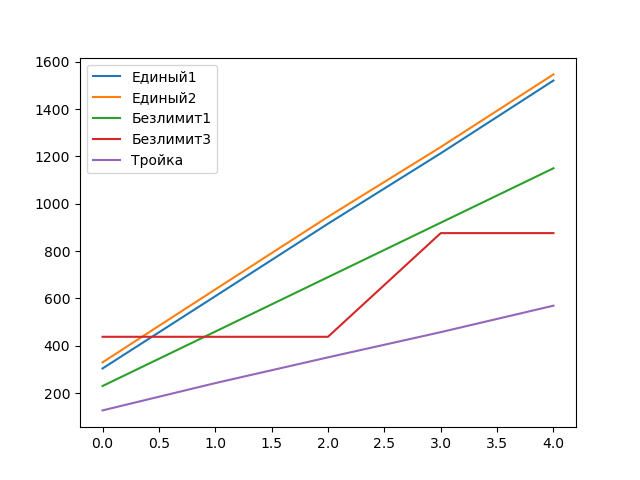

In [122]:
число_поездок, вектор_потрачено = list(zip(*res))
билеты_потрачено = list(zip(*map(lambda x: np.average(np.transpose(np.array(x)), axis=1), вектор_потрачено)))
for потрачено in билеты_потрачено:
    pp.plot(число_поездок, потрачено)
pp.legend([str(билет()) for билет in билеты])

In [117]:
билеты_потрачено

[(305.8, 611.05, 914.65, 1218.8, 1518.0),
 (330.0, 639.1, 944.9, 1244.1, 1543.3),
 (230.0, 460.0, 690.0, 920.0, 1150.0),
 (438.0, 438.0, 438.0, 876.0, 876.0),
 (126.98, 243.95, 358.52, 470.72, 582.5)]

In [118]:
876/59

14.847457627118644